## Star Wars Survey
### Introduction

The aim of this project is cleaning and exploring the survey data from Star Wars fans.
The FiveThirthyEight team was wondering: **does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?**.

The team needed to collect data addressing this question. They surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses. 
[Data Source](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [1]:
# read data
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
# keeping only the rows with not NaN `RespondentID`
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [4]:
star_wars['RespondentID'].isnull().value_counts()

False    1186
Name: RespondentID, dtype: int64

### Cleaning and Mapping Yes/No Columns
Converting the
- Have you seen any of the 6 films in the Star Wars franchise? 
- Do you consider yourself to be a fan of the Star Wars film franchise?   

column values into booleans.

In [5]:
# mapping dictionary
yes_no = {
    "Yes": True, 
    "No": False
}

cols = ["Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]

for col in cols:
    star_wars[col] = star_wars[col].map(yes_no)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning and Mapping Checkbox Columns
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the queston, `Which of the following Star Wars films have you seen? Please select all that apply.`

In [6]:
import numpy as np

true_false = {"Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True   
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(true_false)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
# rename the columns
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2", 
    "Unnamed: 5": "seen_3", 
    "Unnamed: 6": "seen_4", 
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"  
})

In [8]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We renamed the columns to more intuitive names. If the respondent saw the first Star Wars movie, the value is `True` for `seen_1`, and so on.

### Cleaning the Ranking Columns
The next six columns ask the respondent to rank Star Wars movies in order of least favorite to most favorite. `1` means that the movie was the most favorite, `6` represents the leas favorite.

We'll rename columns and convert the data type to float.

In [9]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2", 
    "Unnamed: 11": "ranking_3", 
    "Unnamed: 12": "ranking_4", 
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"  
})

In [11]:
star_wars.iloc[:, 8:16].head()

,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."
1,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably
2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably
4,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably
5,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably


### Finding the Highest-Ranked Movie

In [12]:
# compute the mean 
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<BarContainer object of 6 artists>

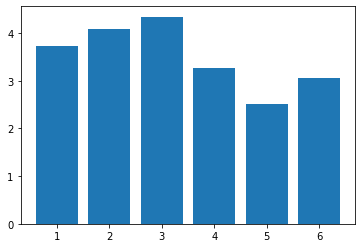

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(1,7),star_wars[star_wars.columns[9:15]].mean(), align="center")

### Conclusion on Movie Rating
To remember that the ranking was from 1 - the best movie, to 6 - the least preferred movie. The lower the mean, the best. 

From the chart above, the last 3 Star Wars movies were ranked higher. 
We tend to assume that the newest movies are better because of the new technology available in the film industry. 

### Finding the Most Viewed Movie

In [14]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

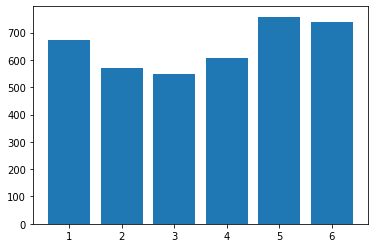

In [15]:
plt.bar(range(1,7),star_wars[star_wars.columns[3:9]].sum() )

### Conclusion on the Most Viewed Movie

It appears that the earlier movies were the most watched. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.
### Exploring the Data by Binary Segments
We can split the data frame into two groups by gender, so we can compute the preferences by gender.

In [16]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

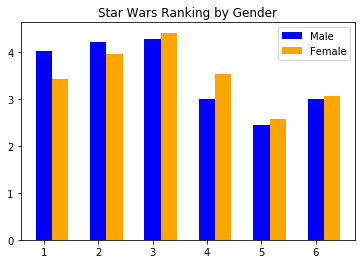

In [17]:
Gender = ["Male", "Female"]
pos = np.arange(1,7)

plt.bar(pos, males[males.columns[9:15]].mean(), 0.3, color="blue")
plt.bar(pos+0.3,females[females.columns[9:15]].mean(), 0.3, color="orange")
plt.title('Star Wars Ranking by Gender')
plt.legend(Gender,loc=1)

plt.show()

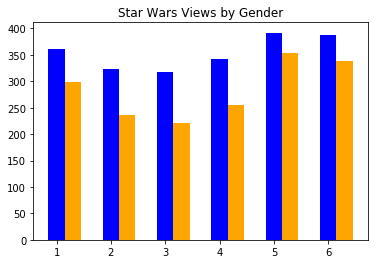

In [18]:
plt.bar(pos, males[males.columns[3:9]].sum(), 0.3, color="blue")
plt.bar(pos+0.3,females[females.columns[3:9]].sum(), 0.3, color="orange")
plt.title('Star Wars Views by Gender')
#plt.legend(Gender,loc=2)
plt.show()


### Male/Female differences in favorite Star Wars movie and most seen movie

As the above plots show, more males watched the Star Wars movies, also males liked the last three episodes more than females.

Let's explore further and segment the data by `Education`, and plot the views and rankings.

In [19]:
star_wars["Education"].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [20]:
college = star_wars[star_wars["Education"] == "Some college or Associate degree"]
bachelor = star_wars[star_wars["Education"] == "Bachelor degree"]
graduate = star_wars[star_wars["Education"] == "Graduate degree"]
high_school = star_wars[star_wars["Education"] == "High school degree"]
less_than_high_school = star_wars[star_wars["Education"] == "Less than high school degree"]
degree = [graduate, college, bachelor, high_school, less_than_high_school]

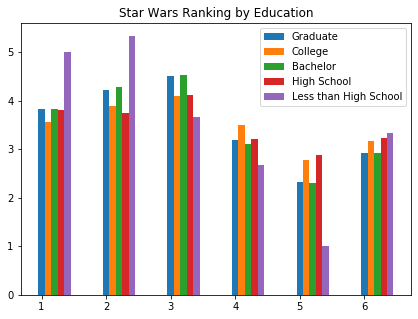

In [21]:
Degree = ["Graduate", "College", "Bachelor", "High School", "Less than High School"]
pos = np.arange(1,7)
plt.figure(figsize=(7,5))
w = 0
for d in degree:    
    plt.bar(pos + w, d[d.columns[9:15]].mean(), 0.1)
    w += 0.1
plt.title('Star Wars Ranking by Education')
plt.legend(Degree,loc=1)

plt.show()

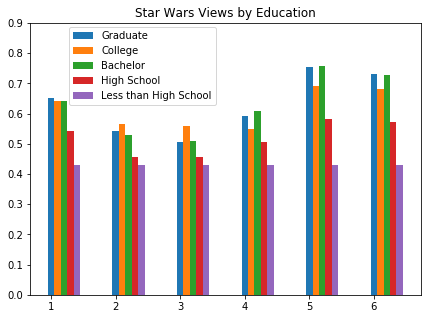

In [22]:
pos = np.arange(1,7)
plt.figure(figsize=(7,5))
w = 0
for d in degree:    
    plt.bar(pos + w, d[d.columns[3:9]].mean(), 0.1)
    w += 0.1
plt.title('Star Wars Views by Education')
plt.legend(Degree,loc=[0.1, 0.7])
plt.ylim(0, 0.9)

plt.show()

We segmented the data into 5 education categories and studied the rankings and views of Star Wars movies by this segmentation.
The last two movies are very popular between Graduate and Bachelor degrees people. Also, the Graduate, Bachelor and Less than High School surveyed people gave the maximum rank on average to the 5th Star Wars movie.